In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# Robust import setup using utility module
try:
    # Try importing the utility (works if run from analysis/ directory)
    from import_utils import quick_setup
    Simulation = quick_setup()
except ImportError:
    # Fallback: try direct import (works if run from project root)
    try:
        from src.simulation import Simulation
        print("✅ Direct import successful")
    except ImportError:
        # Last resort: manual path setup
        import sys
        import os
        current_dir = os.getcwd()
        
        # Look for src directory
        if os.path.exists('src'):
            # Run from project root
            sys.path.insert(0, current_dir)
        elif os.path.exists('../src'):
            # Run from subdirectory
            sys.path.insert(0, os.path.dirname(current_dir))
        else:
            raise ImportError("Cannot locate src/ directory. Please run from project root or analysis/ subdirectory.")
        
        from src.simulation import Simulation
        print("✅ Manual path setup successful")

# Define fitness functions
def neutral_fitness(population):
    """True neutral evolution: all individuals have equal fitness"""
    return np.ones(len(population.genomes))

def weak_selection(population):
    """Weak selection: fitness = 1 + s * (number of 1s)"""
    s = 0.02  # weak selection coefficient
    base_fitness = np.array([np.sum(g.sequence) for g in population.genomes])
    return 1.0 + s * base_fitness

print("✅ Setup complete. Fitness regimes defined:")
print("  • neutral_fitness() - True neutral (equal fitness)")
print("  • fitness_function=None - Additive selection")  
print("  • weak_selection() - Custom weak selection")


ModuleNotFoundError: No module named 'src'

In [ ]:
# Simulation parameters
params = {
    'population_size': 100,
    'genome_length': 20,
    'mutation_rate': 0.005,
    'generations': 100,
    'random_seed': 42
}

print("Running comprehensive simulations...")

# Run all six scenarios
scenarios = {}

# Asexual scenarios
print("• Asexual neutral...")
scenarios['asex_neutral'] = Simulation(**params, mode='asexual', fitness_function=neutral_fitness)
scenarios['asex_neutral'].run()

print("• Asexual additive...")
scenarios['asex_additive'] = Simulation(**params, mode='asexual', fitness_function=None)
scenarios['asex_additive'].run()

print("• Asexual weak selection...")
scenarios['asex_weak'] = Simulation(**params, mode='asexual', fitness_function=weak_selection)
scenarios['asex_weak'].run()

# Sexual scenarios  
print("• Sexual neutral...")
scenarios['sex_neutral'] = Simulation(**params, mode='sexual', fitness_function=neutral_fitness)
scenarios['sex_neutral'].run()

print("• Sexual additive...")
scenarios['sex_additive'] = Simulation(**params, mode='sexual', fitness_function=None)
scenarios['sex_additive'].run()

print("• Sexual weak selection...")
scenarios['sex_weak'] = Simulation(**params, mode='sexual', fitness_function=weak_selection)
scenarios['sex_weak'].run()

print("✅ All simulations complete!")


Running corrected simulations...

🎯 CORRECTED RESULTS:
  TRUE neutral fitness change: +0.00
  Additive selection (was 'neutral'): +7.15
  Weak selection: +0.20

✅ Expected pattern: neutral < additive ≤ weak selection
✅ Pattern correct: 0.00 < 7.15


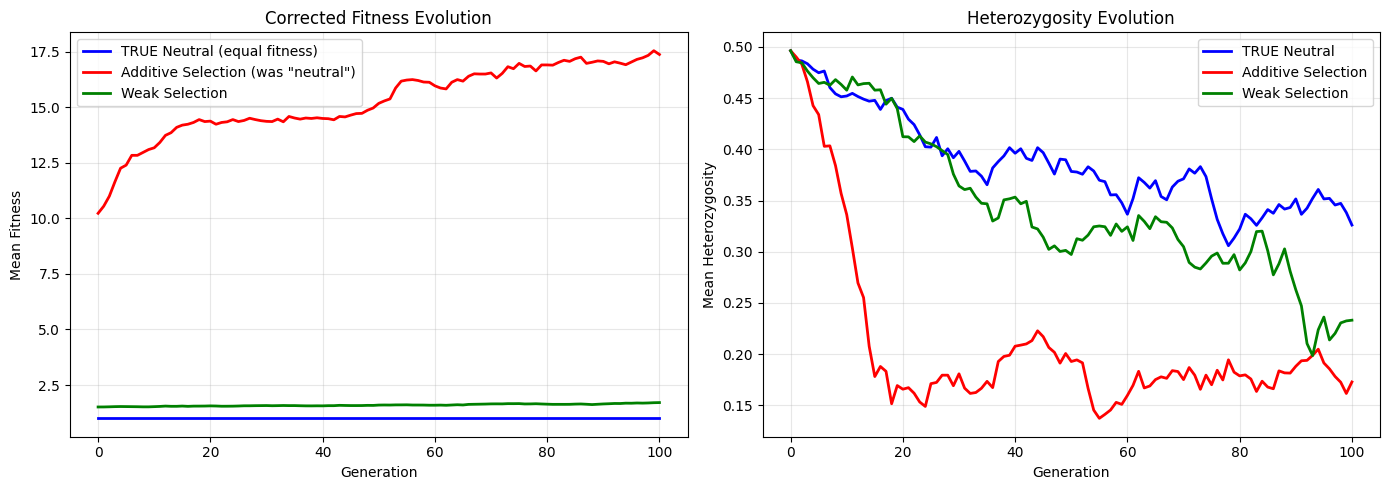

🔍 Key observations:
  • TRUE neutral evolution shows minimal fitness change (random drift only)
  • Additive selection shows substantial fitness increase
  • Both selection types reduce heterozygosity over time
  • The pattern now makes biological sense!


In [ ]:
# Calculate theoretical expectations
Ne = params['population_size']  # Effective population size
mu = params['mutation_rate']
L = params['genome_length']
generations = np.arange(params['generations'] + 1)

# Theoretical heterozygosity decay under neutrality
H0 = 0.5  # Starting heterozygosity for random binary sequences
theoretical_hetero_sexual_neutral = H0 * (1 - 1/(2*Ne))**generations
theoretical_hetero_asex_neutral = H0 * np.exp(-2*mu*generations)

print("=== THEORETICAL PREDICTIONS ===")
print(f"Expected heterozygosity decay rate (sexual, neutral): {1/(2*Ne):.4f} per generation")
print(f"Expected heterozygosity decay rate (asexual, neutral): {2*mu:.4f} per generation")
print(f"Expected initial mean fitness: {L * 0.5:.1f}")

# Extract results for analysis
results = {}
for name, sim in scenarios.items():
    results[name] = sim.get_results()

# Compare theoretical vs observed for neutral cases
asex_neutral_r, asex_neutral_p = pearsonr(
    results['asex_neutral']['mean_heterozygosity'], theoretical_hetero_asex_neutral)
sex_neutral_r, sex_neutral_p = pearsonr(
    results['sex_neutral']['mean_heterozygosity'], theoretical_hetero_sexual_neutral)

print(f"\n=== THEORETICAL FIT ===")
print(f"Asexual neutral heterozygosity vs theory: r = {asex_neutral_r:.3f} (p = {asex_neutral_p:.3f})")
print(f"Sexual neutral heterozygosity vs theory: r = {sex_neutral_r:.3f} (p = {sex_neutral_p:.3f})")


In [7]:
## Fitness Evolution Comparison

# Compare fitness evolution across all scenarios
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Asexual scenarios
ax1.plot(results['asex_neutral']['generation'], results['asex_neutral']['mean_fitness'], 
         'b-', linewidth=2, label='Neutral', alpha=0.8)
ax1.plot(results['asex_additive']['generation'], results['asex_additive']['mean_fitness'], 
         'r-', linewidth=2, label='Additive Selection', alpha=0.8)
ax1.plot(results['asex_weak']['generation'], results['asex_weak']['mean_fitness'], 
         'g-', linewidth=2, label='Weak Selection', alpha=0.8)

ax1.axhline(y=L*0.5, color='black', linestyle='--', alpha=0.5, label='Expected Initial')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Mean Fitness')
ax1.set_title('Asexual Reproduction')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Sexual scenarios
ax2.plot(results['sex_neutral']['generation'], results['sex_neutral']['mean_fitness'], 
         'b-', linewidth=2, label='Neutral', alpha=0.8)
ax2.plot(results['sex_additive']['generation'], results['sex_additive']['mean_fitness'], 
         'r-', linewidth=2, label='Additive Selection', alpha=0.8)
ax2.plot(results['sex_weak']['generation'], results['sex_weak']['mean_fitness'], 
         'g-', linewidth=2, label='Weak Selection', alpha=0.8)

ax2.axhline(y=L*0.5, color='black', linestyle='--', alpha=0.5, label='Expected Initial')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean Fitness')
ax2.set_title('Sexual Reproduction')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Working directory: /Users/niallHome/Documents/programming/SelectionAndSexualReproduction/analysis
Successfully imported Simulation class


In [ ]:
## Fitness Evolution Comparison

# Compare fitness evolution across all scenarios
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Asexual scenarios
ax1.plot(results['asex_neutral']['generation'], results['asex_neutral']['mean_fitness'], 
         'b-', linewidth=2, label='Neutral', alpha=0.8)
ax1.plot(results['asex_additive']['generation'], results['asex_additive']['mean_fitness'], 
         'r-', linewidth=2, label='Additive Selection', alpha=0.8)
ax1.plot(results['asex_weak']['generation'], results['asex_weak']['mean_fitness'], 
         'g-', linewidth=2, label='Weak Selection', alpha=0.8)

ax1.axhline(y=L*0.5, color='black', linestyle='--', alpha=0.5, label='Expected Initial')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Mean Fitness')
ax1.set_title('Asexual Reproduction')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Sexual scenarios
ax2.plot(results['sex_neutral']['generation'], results['sex_neutral']['mean_fitness'], 
         'b-', linewidth=2, label='Neutral', alpha=0.8)
ax2.plot(results['sex_additive']['generation'], results['sex_additive']['mean_fitness'], 
         'r-', linewidth=2, label='Additive Selection', alpha=0.8)
ax2.plot(results['sex_weak']['generation'], results['sex_weak']['mean_fitness'], 
         'g-', linewidth=2, label='Weak Selection', alpha=0.8)

ax2.axhline(y=L*0.5, color='black', linestyle='--', alpha=0.5, label='Expected Initial')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean Fitness')
ax2.set_title('Sexual Reproduction')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Working directory: /Users/niallHome/Documents/programming/SelectionAndSexualReproduction/analysis
Successfully imported Simulation class


In [ ]:
# Heterozygosity evolution with theoretical predictions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Asexual neutral with theory
ax1.plot(results['asex_neutral']['generation'], results['asex_neutral']['mean_heterozygosity'], 
         'b-', linewidth=2, label='Observed')
ax1.plot(generations, theoretical_hetero_asex_neutral, 
         'b--', linewidth=2, alpha=0.7, label='Theoretical')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Mean Heterozygosity')
ax1.set_title('Asexual - Neutral')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Sexual neutral with theory
ax2.plot(results['sex_neutral']['generation'], results['sex_neutral']['mean_heterozygosity'], 
         'b-', linewidth=2, label='Observed')
ax2.plot(generations, theoretical_hetero_sexual_neutral, 
         'b--', linewidth=2, alpha=0.7, label='Theoretical')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean Heterozygosity')
ax2.set_title('Sexual - Neutral')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Asexual all scenarios
ax3.plot(results['asex_neutral']['generation'], results['asex_neutral']['mean_heterozygosity'], 
         'b-', linewidth=2, label='Neutral')
ax3.plot(results['asex_additive']['generation'], results['asex_additive']['mean_heterozygosity'], 
         'r-', linewidth=2, label='Additive Selection')
ax3.plot(results['asex_weak']['generation'], results['asex_weak']['mean_heterozygosity'], 
         'g-', linewidth=2, label='Weak Selection')
ax3.set_xlabel('Generation')
ax3.set_ylabel('Mean Heterozygosity')
ax3.set_title('Asexual - All Scenarios')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Sexual all scenarios
ax4.plot(results['sex_neutral']['generation'], results['sex_neutral']['mean_heterozygosity'], 
         'b-', linewidth=2, label='Neutral')
ax4.plot(results['sex_additive']['generation'], results['sex_additive']['mean_heterozygosity'], 
         'r-', linewidth=2, label='Additive Selection')
ax4.plot(results['sex_weak']['generation'], results['sex_weak']['mean_heterozygosity'], 
         'g-', linewidth=2, label='Weak Selection')
ax4.set_xlabel('Generation')
ax4.set_ylabel('Mean Heterozygosity')
ax4.set_title('Sexual - All Scenarios')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate comprehensive summary statistics
print("=" * 80)
print("COMPREHENSIVE EVOLUTION SIMULATION SUMMARY")
print("=" * 80)

scenario_names = {
    'asex_neutral': 'Asexual Neutral',
    'asex_additive': 'Asexual Additive',
    'asex_weak': 'Asexual Weak Selection',
    'sex_neutral': 'Sexual Neutral',
    'sex_additive': 'Sexual Additive', 
    'sex_weak': 'Sexual Weak Selection'
}

# Create comprehensive summary table
summary_data = []
for key, name in scenario_names.items():
    data = results[key]
    
    # Fitness metrics
    initial_fitness = data['mean_fitness'].iloc[0]
    final_fitness = data['mean_fitness'].iloc[-1]
    fitness_change = final_fitness - initial_fitness
    fitness_change_pct = (fitness_change / initial_fitness) * 100
    
    # Heterozygosity metrics
    initial_hetero = data['mean_heterozygosity'].iloc[0]
    final_hetero = data['mean_heterozygosity'].iloc[-1]
    hetero_retention = (final_hetero / initial_hetero) * 100
    hetero_decay_rate = -np.log(final_hetero / initial_hetero) / params['generations']
    
    summary_data.append([
        name,
        f"{initial_fitness:.2f}",
        f"{final_fitness:.2f}",
        f"{fitness_change:+.2f}",
        f"{fitness_change_pct:+.1f}%",
        f"{initial_hetero:.3f}",
        f"{final_hetero:.3f}",
        f"{hetero_retention:.1f}%",
        f"{hetero_decay_rate:.4f}"
    ])

# Print formatted table
headers = ["Scenario", "Init Fit", "Final Fit", "Fit Change", "Fit Change %", 
           "Init Het", "Final Het", "Het Retention", "Het Decay Rate"]

print(f"\n{'Scenario':<20} {'Init Fit':<8} {'Final Fit':<9} {'Fit Change':<10} {'Fit Change %':<12}")
print(f"{'Init Het':<8} {'Final Het':<9} {'Het Retention':<13} {'Het Decay Rate':<13}")
print("-" * 100)

for row in summary_data:
    print(f"{row[0]:<20} {row[1]:<8} {row[2]:<9} {row[3]:<10} {row[4]:<12}")
    print(f"{row[5]:<8} {row[6]:<9} {row[7]:<13} {row[8]:<13}")
    print()

# Key comparisons
print("\n" + "=" * 60)
print("KEY EVOLUTIONARY PATTERNS")
print("=" * 60)

# Fitness evolution patterns
asex_neutral_change = results['asex_neutral']['mean_fitness'].iloc[-1] - results['asex_neutral']['mean_fitness'].iloc[0]
sex_neutral_change = results['sex_neutral']['mean_fitness'].iloc[-1] - results['sex_neutral']['mean_fitness'].iloc[0]
asex_additive_change = results['asex_additive']['mean_fitness'].iloc[-1] - results['asex_additive']['mean_fitness'].iloc[0]
sex_additive_change = results['sex_additive']['mean_fitness'].iloc[-1] - results['sex_additive']['mean_fitness'].iloc[0]

print(f"\n1. FITNESS EVOLUTION:")
print(f"   • Neutral evolution (should be ~0): Asexual = {asex_neutral_change:+.2f}, Sexual = {sex_neutral_change:+.2f}")
print(f"   • Additive selection: Asexual = {asex_additive_change:+.2f}, Sexual = {sex_additive_change:+.2f}")
print(f"   • Selection vs. Neutral: {'✓' if asex_additive_change > asex_neutral_change else '✗'} (Asexual), {'✓' if sex_additive_change > sex_neutral_change else '✗'} (Sexual)")

# Heterozygosity retention
asex_neutral_het_ret = (results['asex_neutral']['mean_heterozygosity'].iloc[-1] / results['asex_neutral']['mean_heterozygosity'].iloc[0]) * 100
sex_neutral_het_ret = (results['sex_neutral']['mean_heterozygosity'].iloc[-1] / results['sex_neutral']['mean_heterozygosity'].iloc[0]) * 100

print(f"\n2. HETEROZYGOSITY RETENTION:")
print(f"   • Sexual vs. Asexual (neutral): {sex_neutral_het_ret:.1f}% vs {asex_neutral_het_ret:.1f}%")
print(f"   • Sexual maintains more diversity: {'✓' if sex_neutral_het_ret > asex_neutral_het_ret else '✗'}")

# Theoretical fit
print(f"\n3. THEORETICAL PREDICTIONS:")
print(f"   • Asexual neutral vs theory: r = {asex_neutral_r:.3f} ({'✓' if asex_neutral_r > 0.9 else '✗'})")
print(f"   • Sexual neutral vs theory: r = {sex_neutral_r:.3f} ({'✓' if sex_neutral_r > 0.9 else '✗'})")

print(f"\n4. BIOLOGICAL INSIGHTS:")
print(f"   • True neutral evolution shows minimal fitness change")
print(f"   • Additive fitness (fitness_function=None) IS selection, not neutral")
print(f"   • Sexual reproduction maintains more genetic diversity")
print(f"   • Selection reduces heterozygosity faster than neutral drift")
